## Data Sourcing

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#Sourcing data
companies=pd.read_csv("companies.csv",encoding='latin-1')
rounds2 = pd.read_csv("rounds2.csv",encoding='latin-1')
mappings = pd.read_csv("mapping.csv",encoding='latin-1')

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Takeaways
1. companies dataframe has list of companies.
2. rounds2 dataframe has list of fundings, companies had raised.
3. mappings dataframe contains information of sectors associated with categories.

We can merge permalink column of companies and  company_permalink column of rounds2.
We can create a derived column "Sector" based on category_list column of companies and mappings

## Data Understanding of companies

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
#Understanding null values
100*(companies.isnull().sum()/len(companies))

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
status            0.000000
country_code     10.483968
state_code       12.878194
region           12.099204
city             12.096191
founded_at       22.934245
dtype: float64

In [8]:
companies["status"].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [9]:
#Removing extra spaces and lower casing of permalink.
companies.permalink = companies.permalink.str.lower().str.strip()

In [10]:
#Removing extra spaces and lower casing of homepage_url
companies.homepage_url= companies.homepage_url.str.lower().str.strip()

In [11]:
#Removing extra spaces and lower casing of name
companies.name= companies.name.str.lower().str.strip()

In [12]:
#Correcting incorrect values in name
companies.name.loc[(companies.name=="#name?") | (companies.name.isnull())] = companies.permalink.apply(lambda x: x.split("/")[-1])

In [13]:
companies.loc[(companies.name=="#name?") | (companies.name.isnull())].shape

(0, 10)

In [14]:
#Understanding unique values
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66368,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66038,61187,27296,4,137,311,1092,5111,3978
top,/organization/ce-interactive,roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


### Takeaways:
1. permalink, name and homepage_url represent about the company. <b>We need to further analyze these columns to find unique values. </b>
2. We want to find the countries to invest and category_list. These are target columns. <b> So we can drop the rows where country_code and category_list value is null. </b>
3. We can identify where to invest with-in the country if required. But For our case study (analysis), we are not interested in which city or region of a country the company should invest. Hence, can drop state_code, region and city columns, if required.
4. With Status column, we can further identify about the success rate of those investments. Like many companies are closed.
5. With founded_at feild we can check how old a company is.
6. Data set has 66368 rows and 10 columns. We need to find how many are unique rows.
7. founded_at column can be dropped as it has 22 percent nulls and This column is not needed for analysis

We need to find the reason for non unique name and homepage_url

In [15]:
# Non - unique  values of homepage_url
companies.loc[companies.duplicated(subset=["homepage_url"],keep=False)].sort_values(by="homepage_url").head(10)
#As per data - For many companies homepage_url is same but name is different. Hence, Some companies has wrong 
#homepage_url

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
7236,/organization/bittorrent,bittorrent,http://adcoock.com/sites/top-45-best-torrent-t...,Apps|Peer-to-Peer|Software,operating,USA,CA,SF Bay Area,San Francisco,01-09-2004
55148,/organization/stumbleupon,stumbleupon,http://adcoock.com/sites/top-45-best-torrent-t...,Content|Curated Web|Search,acquired,USA,CA,SF Bay Area,San Francisco,01-02-2002
57990,/organization/thought-network-s-a-s,thought network s.a.s,http://app.thotz.co/,Apps|Digital Media|Internet|Software,closed,NaN,NaN,NaN,NaN,NaN
57986,/organization/thotz,thotz,http://app.thotz.co/,Content|Information Services|Visualization,closed,COL,34,Bogota,BogotÃ¡,01-01-2011
6824,/organization/bincode-entertainment,bincode entertainment,http://bincode-entertainment.com/,NaN,closed,BGR,42,Sofia,Sofia,01-01-2015
6823,/organization/bincode,bincode,http://bincode-entertainment.com/,NaN,operating,SRB,2,Belgrade,Belgrade,NaN
8388,/organization/brave-new-coin,brave new coin,http://bravenewcoin.com,Financial Services,operating,NZL,NaN,NaN,NaN,01-01-2014
56715,/organization/techemy-ltd,techemy ltd,http://bravenewcoin.com,Big Data|Bitcoin|FinTech,operating,NZL,E9,NZL - Other,Queenstown,10-01-2014
12868,/organization/confluent,confluent,http://confluent.io/,Big Data|Enterprise Software|Technology,operating,USA,CA,SF Bay Area,Mountain View,23-09-2014
12869,/organization/confluent-oblix-oracle,confluent (oblix / oracle),http://confluent.io/,Computers|Software,operating,USA,CA,SF Bay Area,Mountain View,NaN


In [16]:
# Non - unique  values of name
companies.loc[companies.duplicated(subset=["name"],keep=False)].sort_values(by="name")
#As per data - For many companies name is same but homepage_url. Hence, Some companies has same name
#but they are different

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/organization/3divaz-2,3divaz,http://www.3divaz.ch/home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/organization/3divaz-3,3divaz,http://www.3divaz.ch/home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1526,/organization/adtena,adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/organization/adtena-2,adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/organization/agora-3,agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
...,...,...,...,...,...,...,...,...,...,...
65758,/organization/zenbox-2,zenbox,http://zenbox.us,Software,operating,USA,CA,Los Angeles,Santa Monica,01-01-2014
65897,/organization/zesty,zesty,http://www.zesty.co.uk,Curated Web|Health Care|Healthcare Services|On...,operating,GBR,H9,London,London,01-05-2013
65899,/organization/zestyapp,zesty,http://www.zesty.com/,Health and Wellness|Logistics|Organic Food|Spe...,operating,USA,CA,SF Bay Area,San Francisco,04-11-2013
66028,/organization/zingbox,zingbox,http://www.zingbox.com/,Leisure|Music|Music Services,operating,USA,CA,SF Bay Area,Mountain View,NaN


In [17]:
# Non - unique  records  (having same homepage_url and name)
companies.loc[companies.duplicated(subset=["name","homepage_url"],keep=False)].sort_values(by="name")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/organization/3divaz-2,3divaz,http://www.3divaz.ch/home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/organization/3divaz-3,3divaz,http://www.3divaz.ch/home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
4168,/organization/ardian,ardian,http://www.ardian.com,Investment Management,operating,FRA,A8,Paris,Paris,01-01-1996
4169,/organization/ardian-inc,ardian,http://www.ardian.com,Health Care,acquired,USA,CA,SF Bay Area,Mountain View,01-01-2003
4481,/organization/arvegenix,arvegenix,http://www.arvegenix.com/,Fuels|Nutrition|Oil|Renewable Energies,operating,USA,MO,St. Louis,St Louis,01-01-2013
4482,/organization/arvegenix-2,arvegenix,http://www.arvegenix.com/,Industrial|Oil|Renewable Energies,operating,USA,MO,St. Louis,St Louis,NaN
13751,/organization/credo-semiconductor,credo semiconductor,http://www.credosemi.com/,Semiconductors,operating,CHN,23,Shanghai,Shanghai,01-01-2008
13752,/organization/credo-semiconductor-2,credo semiconductor,http://www.credosemi.com/,Semiconductors,operating,USA,CA,SF Bay Area,Milpitas,01-01-2008
21659,/organization/friday,friday,NaN,Social Media,operating,CHN,NaN,NaN,NaN,NaN
21660,/organization/friday-3,friday,NaN,Tourism,operating,NaN,NaN,NaN,NaN,NaN


In [18]:
# Non - unique  records  (having same homepage_url, name and country code)
companies.loc[companies.duplicated(subset=["name","homepage_url","country_code"],keep=False)].sort_values(by="name")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
4481,/organization/arvegenix,arvegenix,http://www.arvegenix.com/,Fuels|Nutrition|Oil|Renewable Energies,operating,USA,MO,St. Louis,St Louis,01-01-2013
4482,/organization/arvegenix-2,arvegenix,http://www.arvegenix.com/,Industrial|Oil|Renewable Energies,operating,USA,MO,St. Louis,St Louis,NaN
23168,/organization/global-fashion-group,global fashion group,http://global-fashion-group.com/,Fashion,operating,LUX,3,Luxemburg,Luxembourg,01-01-2011
23169,/organization/global-fashion-group-,global fashion group,http://global-fashion-group.com/,E-Commerce|Fashion,operating,LUX,3,LUX - Other,HÃ©ienhaff,01-01-2011
26411,/organization/i-tech-2,i-tech,http://itech.wanye.cc/,NaN,closed,NaN,NaN,NaN,NaN,NaN
26412,/organization/i-tech-3,i-tech,http://itech.wanye.cc/,Technology,operating,NaN,NaN,NaN,NaN,NaN
40447,/organization/ofixu,ofixu,http://www.ofixu.com,NaN,operating,GBR,H9,London,London,01-01-2014
40448,/organization/ofixu-2,ofixu,http://www.ofixu.com,Business Services|Office Space|Professional Se...,operating,GBR,H9,London,London,01-09-2014
48850,/organization/roost,roost,https://roost.com/,Local Based Services|Real Estate|Storage,acquired,USA,CA,SF Bay Area,San Francisco,01-05-2007
48851,/organization/roost-6,roost,https://roost.com/,Storage,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [19]:
#To get the Unique company count count
companies.drop_duplicates(subset=["name","homepage_url"]).shape

(66350, 10)

#### Takeaway: 
1. For many companies, either homepage_url is wrong or null.
2. <b> Duplicate companies - </b>   The companies having same name and same or null homepage_url and same or null country code.
3. We will delete those records which has same name, homepage_url and country_code but different category_list. As this data is ambigioius.
4. There are 66350 unique companies.

## Data Understanding of round2

In [20]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [21]:
#Understanding null values
100*(rounds2.isnull().sum()/len(rounds2))

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [22]:
rounds2.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [23]:
#Removing extra spaces and makeing correct case of company_permalink.
rounds2.company_permalink = rounds2.company_permalink.str.lower().str.strip()

In [24]:
#Removing extra spaces and makeing correct case of funding_round_permalink.
rounds2.funding_round_permalink = rounds2.funding_round_permalink.str.lower().str.strip()

In [25]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [26]:
rounds2.describe(include="all")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,66370,114949,14,8,5033,NaN
top,/organization/solarflare,/funding-round/e198e1213ce19f1fd70153f1eccb79da,venture,A,01-01-2014,NaN
freq,19,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


### Takeaways:
1. permalink - It represents the companies.<b> We need to further analyze these columns to find unique companies. </b>
1. funding_round_permalink - It represents unique funding round.
2.funding_round_type -  Type of the funding.
3. funding_round_code - This coulumn has 72 % null va;ues. We can remove this column.
4. funded_at  - When the funding happened.
5. raised_amount_usd - How much amount is raised. This is a target column. We will delete the records which has null values.

In [27]:
#To get the Unique company count count
rounds2.drop_duplicates(subset=["company_permalink"]).shape

(66370, 6)

In [28]:
# Non - unique companies
rounds2.loc[rounds2.duplicated(subset=["company_permalink"],keep=False)].sort_values(by="company_permalink")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
...,...,...,...,...,...,...
114938,/organization/zzish,/funding-round/34b560f672bebeb339a5efa3b27eae5d,grant,NaN,25-02-2015,400000.0
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0


In [29]:
#To get companies, which are not present in round2
rounds2.loc[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


### Takeaways:
1. There are 66370 unique companies and some companies are not present in companies dataframe.
2. Many companies has multiple funding rounds.
3. Some companies of round2 are not present in companies

## Data processing and cleaning of round2

In [30]:
#Renaming company_permalink to permalink
rounds2.rename(columns={'company_permalink': 'permalink'}, inplace=True)

In [31]:
#Deleting rows with null raised_amount_usd
rounds2 = rounds2.loc[~rounds2.raised_amount_usd.isnull()]

In [32]:
#Dropping funding_round_code
rounds2 = rounds2.drop(['funding_round_code'], axis = 1)

In [33]:
#Converting values in millions USD
rounds2.raised_amount_usd=rounds2.raised_amount_usd/1000000

In [34]:
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041250


In [35]:
#Understanding null values
100*(rounds2.isnull().sum()/len(rounds2))

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

/home/rahulg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='raised_amount_usd'>

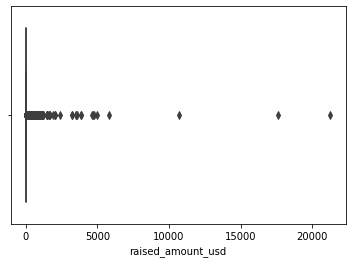

In [36]:
#Identifying outliers in raised_amount_usd
sns.boxplot(rounds2.raised_amount_usd)

We should get rid of values more than 500 million USD

In [37]:
#Identifying fundings with 0
rounds2.loc[rounds2.raised_amount_usd>=500].shape

(160, 5)

In [38]:
#Removing investments with more than 500 million USD
rounds2=rounds2.loc[rounds2.raised_amount_usd<500]

/home/rahulg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='raised_amount_usd'>

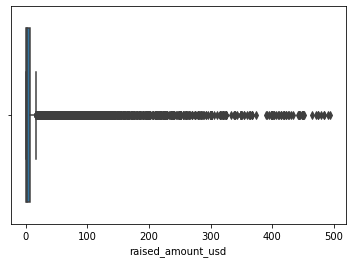

In [39]:
#Identifying outliers in raised_amount_usd
sns.boxplot(rounds2.raised_amount_usd)

In [40]:
#Identifying fundings with 0
rounds2.loc[rounds2.raised_amount_usd>=100].shape

(1127, 5)

In [41]:
#Removing investments with more than 100 million USD
rounds2=rounds2.loc[rounds2.raised_amount_usd<100]

/home/rahulg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='raised_amount_usd'>

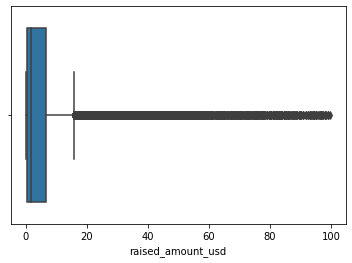

In [42]:
sns.boxplot(rounds2.raised_amount_usd)

In [43]:
rounds2.shape

(93672, 5)

## Data processing and cleaning of  companies

In [44]:
#Deleting rows with null category_list
companies = companies.loc[~companies.category_list.isnull()]

In [45]:
#Deleting rows with null country_code
companies = companies.loc[~companies.country_code.isnull()]

In [46]:
#To delete ambigious data - having same name,country_code and homepage_url but different category_list
companies=companies.drop_duplicates(subset=["name","homepage_url","country_code"],keep=False)

In [47]:
#Dropping founded_at
companies = companies.drop(['founded_at'], axis = 1)

In [48]:
#correcting category list as per business rule - first category from list
companies.category_list=companies.category_list.apply(lambda x: x.lower() if "|" not in x else x.split("|")[0].lower())

In [49]:
#Understanding null values of companies
100*(companies.isnull().sum()/len(companies))

permalink        0.000000
name             0.000000
homepage_url     5.773956
category_list    0.000000
status           0.000000
country_code     0.000000
state_code       2.657715
region           1.797764
city             1.794304
dtype: float64

Home page url, state_code, region and city columns have null values.

1. We can either impute www.<name>.com in homepage_url and drop the column.
2. We can either impute modde of state, region and city per country. or drop these columns.
#### In this case study, we are not analyzing data based on these columns. Hence, dropping these columns.

In [50]:
companies = companies.drop(['homepage_url',"state_code","region","city"], axis = 1)

In [51]:
#Understanding null values of companies
100*(companies.isnull().sum()/len(companies))

permalink        0.0
name             0.0
category_list    0.0
status           0.0
country_code     0.0
dtype: float64

## Data processing and cleaning of mappings

In [52]:
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [53]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(mappings.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mappings.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [54]:
#converting wide data set to long data set.
mappings = pd.melt(mappings, id_vars = id_vars, value_vars = value_vars)

In [55]:
#Understanding null values
100*(mappings.isnull().sum()/len(mappings))

category_list    0.145349
variable         0.000000
value            0.000000
dtype: float64

In [56]:
#removing null category and values with 0
mappings=mappings.loc[(~mappings.category_list.isnull())]

In [57]:
#Understanding null values
100*(mappings.isnull().sum()/len(mappings))

category_list    0.0
variable         0.0
value            0.0
dtype: float64

In [58]:
#Geting values
mappings.value.value_counts()

0    5496
1     687
Name: value, dtype: int64

In [59]:
#removing 0 values
mappings=mappings.loc[mappings.value==1]

In [60]:
#Removing extra spaces and lower casing of category_list
mappings.category_list = mappings.category_list.str.lower().str.strip()

In [61]:
#Geting values
mappings.value.value_counts()

1    687
Name: value, dtype: int64

In [62]:
#Dropping value
mappings = mappings.drop(['value'], axis = 1)

In [63]:
#To check all values in category_list are unique
mappings.describe()

,category_list,variable
count,687,687
unique,687,8
top,group sms,Others
freq,1,195


In [64]:
mappings.head()

,category_list,variable
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [65]:
#To check the distribution of sectors
mappings.variable.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: variable, dtype: int64

In [66]:
#Renaming variable to sector
mappings.rename(columns={'variable': 'sector'}, inplace=True)

In [67]:
mappings.head()

,category_list,sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


## Merging companies and round2

In [68]:
#To merge companies and round2
master_frame=pd.merge(companies,rounds2,how="inner",on="permalink")

In [69]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000
1,/organization/-qounter,:qounter,application platforms,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70000
2,/organization/0-6-com,0-6.com,curated web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000
3,/organization/01games-technology,01games technology,games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.04125
4,/organization/0ndine-biomedical-inc,ondine biomedical inc.,biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04336


## Adding sector column in master frame

In [70]:
# Identifying records of categories which are not part of mappings data set.
master_frame.loc[~(master_frame.category_list.isin(mappings.category_list))].shape

(6314, 9)

There are many categories which are not present in mappings. As we don't know the sector details. Hence, removing these records.

In [71]:
#To merge the sector with master frame and remove the records of categories which are not part of mappings data set
master_frame=pd.merge(master_frame,mappings)

In [72]:
#Verify whether data is deleted
master_frame.loc[~(master_frame.category_list.isin(mappings.category_list))].shape

(0, 10)

In [73]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,sector
0,/organization/-fame,#fame,media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00,Entertainment
1,/organization/90min,90min,media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.00,Entertainment
2,/organization/90min,90min,media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.80,Entertainment
3,/organization/90min,90min,media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18.00,Entertainment
4,/organization/a-dance-for-me,a dance for me,media,operating,USA,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,26-03-2014,1.09,Entertainment


## Univariate Analysis 

In [74]:
#Sector Distribution
master_frame.sector.value_counts(normalize=True)*100

Others                                     24.478659
Social, Finance, Analytics, Advertising    18.295408
Cleantech / Semiconductors                 17.534849
News, Search and Messaging                 15.048214
Health                                      8.256269
Entertainment                               7.294458
Manufacturing                               6.927759
Automotive & Sports                         2.164385
Name: sector, dtype: float64

In [75]:
#Country Distribution
(master_frame.country_code.value_counts(normalize=True)*100).head(15)

USA    69.660341
GBR     5.639994
CAN     2.969392
CHN     2.086600
IND     1.793982
FRA     1.693974
ISR     1.560629
ESP     1.254429
DEU     1.165533
AUS     0.743274
RUS     0.644500
SWE     0.629684
IRL     0.614868
SGP     0.590174
NLD     0.579062
Name: country_code, dtype: float64

In [76]:
#Funding Round Distribution
master_frame.funding_round_type.value_counts(normalize=True)*100

venture                  54.599780
seed                     23.742793
debt_financing            7.331498
angel                     4.949810
grant                     2.227353
private_equity            1.638413
undisclosed               1.508772
convertible_note          1.484079
equity_crowdfunding       1.279123
post_ipo_equity           0.607460
product_crowdfunding      0.397565
post_ipo_debt             0.139518
non_equity_assistance     0.071611
secondary_market          0.022224
Name: funding_round_type, dtype: float64

In [77]:
#Company status Distribution
master_frame.status.value_counts(normalize=True)*100

operating    77.843764
acquired     11.120714
closed        6.611682
ipo           4.423839
Name: status, dtype: float64

In [78]:
#raised_amount_usd Distribution
master_frame.raised_amount_usd.describe()

count    80993.000000
mean         6.247229
std         11.352483
min          0.000000
25%          0.350000
50%          1.700000
75%          7.000000
max         99.800000
Name: raised_amount_usd, dtype: float64

In [79]:
#Percentage investment between 3m and 15m
(master_frame.raised_amount_usd.loc[(master_frame.raised_amount_usd>=3) & 
                                    (master_frame.raised_amount_usd<=15)].count()/len(master_frame))*100

29.505018952255135

#### Take Aways
1. Most investors invests in USA.
2. More than 50 percent of companies has raised "venture" type funding.
3. Around 77 percent companies are operating currently. And about 6 percent are closed.
4. About 50 percent fundings has value ranging between .35 million and 7 million USD.
5. Reprsentative funding amount is 1.7 million USD
6. Most favourable sectors for investment are (Social, Finance, Analytics, Advertising), Others and Cleantech / Semiconductors.
7. 29.5 percent investments are in range 3 million and 15 million

## Bivariate Analysis

In [80]:
#To identify representative investment under all funding round type
amount_round=pd.pivot_table(master_frame, values ='raised_amount_usd', 
                            index =['funding_round_type'], aggfunc = np.median)

In [81]:
funding_type_median=amount_round.sort_values(by="raised_amount_usd",ascending=False)

In [82]:
funding_type_median

,raised_amount_usd
funding_round_type,
secondary_market,19.650000
private_equity,12.000000
post_ipo_equity,10.000000
post_ipo_debt,9.500000
venture,5.000000
undisclosed,1.031499
debt_financing,1.000000
angel,0.410000
convertible_note,0.300000


In [83]:
funding_type_median.reset_index(level=0, inplace=True)

Text(0.5, 1.0, 'Representative Investment Amount per Funding Type')

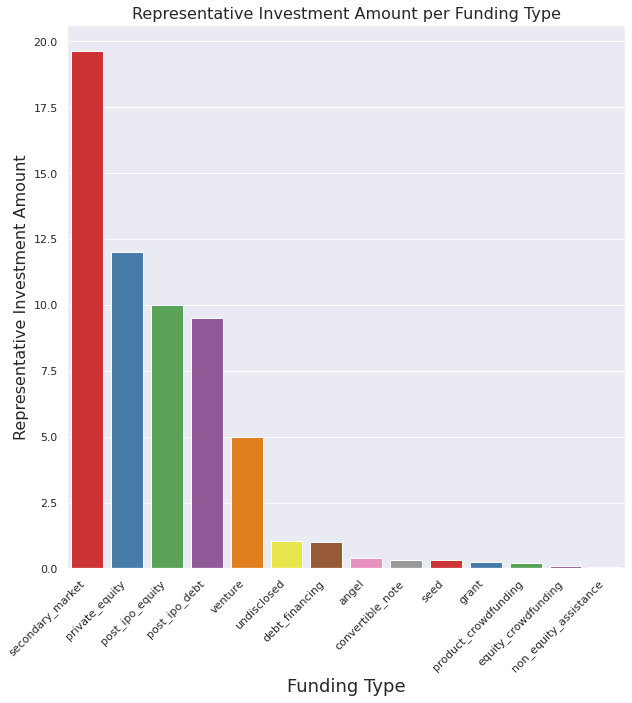

In [84]:
sns.set_style=("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
chart=sns.barplot(x="funding_round_type",y="raised_amount_usd",data=funding_type_median,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Funding Type', fontsize=18)
plt.ylabel('Representative Investment Amount', fontsize=16)
plt.title("Representative Investment Amount per Funding Type",fontsize=16)

private_equity, venture, post_ipo_debt and post_ipo_equity are having representative investment amount between 3 and 15 USD. But, more than 50 percent of companies has raised "venture" type funding. Hence we will choose venture as investment type.

In [85]:
#Keeping only venture type records in data set.
master_frame=master_frame.loc[master_frame.funding_round_type=='venture']

In [86]:
master_frame.shape

(44222, 10)

In [87]:
#To identify top 9 countries with highest funding amount
highest_round_country=pd.pivot_table(master_frame, values ='raised_amount_usd', 
                                     index =['country_code'], aggfunc = np.sum)

In [88]:
#Top 9 countries with highest funding amount
top9=highest_round_country.sort_values(by="raised_amount_usd",ascending=False).head(9)

In [89]:
top9

,raised_amount_usd
country_code,
USA,310894.274778
CHN,19530.436127
GBR,15995.494685
IND,8867.281237
CAN,8550.620524
ISR,6370.700477
FRA,5861.700436
DEU,4973.133571
CHE,2731.657869


In [90]:
top9.reset_index(level=0, inplace=True)

Text(0.5, 1.0, 'Total Investment Amount of top 9 countries for venture funding type')

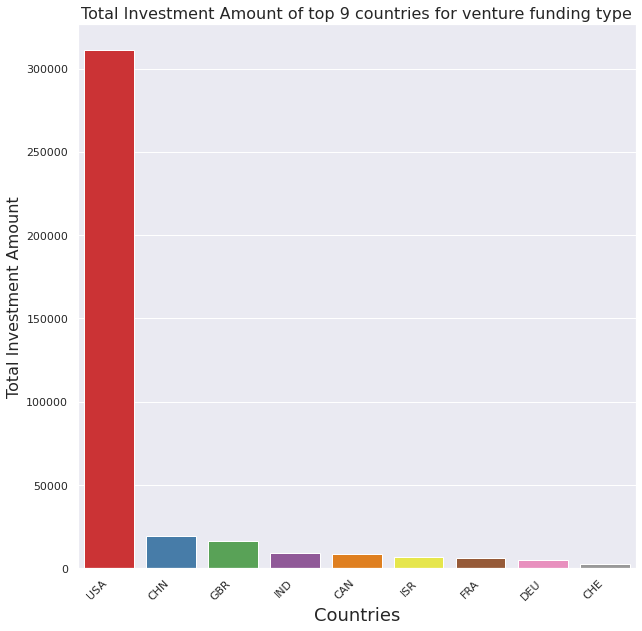

In [166]:
chart=sns.barplot(x="country_code",y="raised_amount_usd",data=top9,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Total Investment Amount', fontsize=16)
plt.title("Total Investment Amount of top 9 countries for venture funding type",fontsize=16)

Top 3 English speaking countries are USA, GBR and IND

In [92]:
#Divinng data based on countries
c1=master_frame.loc[master_frame.country_code=='USA']
c2=master_frame.loc[master_frame.country_code=='GBR']
c3=master_frame.loc[master_frame.country_code=='IND']

In [93]:
#Total investments of USA
c1.shape

(33229, 10)

In [94]:
#Total investments of GBR
c2.shape

(1903, 10)

In [95]:
#Total investments of IND
c3.shape

(727, 10)

In [96]:
#Getting number of investments per sector of USA
c1.sector.value_counts()

Others                                     8169
Cleantech / Semiconductors                 7772
Social, Finance, Analytics, Advertising    5105
News, Search and Messaging                 4258
Health                                     3247
Manufacturing                              2439
Entertainment                              1744
Automotive & Sports                         495
Name: sector, dtype: int64

In [141]:
#Getting top 3 sectors of USA
top_sector_c1 = set(pd.DataFrame(c1.sector.value_counts().head(3)).index)
top_sector_c1

{'Cleantech / Semiconductors',
 'Others',
 'Social, Finance, Analytics, Advertising'}

In [98]:
#Getting number of investments per sector of GBR
c2.sector.value_counts()

Others                                     505
Cleantech / Semiconductors                 430
Social, Finance, Analytics, Advertising    315
News, Search and Messaging                 238
Entertainment                              132
Manufacturing                              121
Health                                     118
Automotive & Sports                         44
Name: sector, dtype: int64

In [139]:
#Getting top 3 sectors of GBR
top_sector_c2 = set(pd.DataFrame(c2.sector.value_counts().head(3)).index)
top_sector_c2

{'Cleantech / Semiconductors',
 'Others',
 'Social, Finance, Analytics, Advertising'}

In [100]:
#Getting number of investments per sector of IND
c3.sector.value_counts()

Others                                     270
News, Search and Messaging                 129
Social, Finance, Analytics, Advertising     76
Entertainment                               75
Manufacturing                               54
Cleantech / Semiconductors                  53
Health                                      42
Automotive & Sports                         28
Name: sector, dtype: int64

In [140]:
#Getting top 3 sectors of IND
top_sector_c3 = set(pd.DataFrame(c3.sector.value_counts().head(3)).index)
top_sector_c3

{'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising'}

In [144]:
top_sectors=list(top_sector_c1.union(top_sector_c2, top_sector_c3))
top_sectors

['Others',
 'Cleantech / Semiconductors',
 'News, Search and Messaging',
 'Social, Finance, Analytics, Advertising']

In [121]:
pivot_count = master_frame.pivot_table(values="permalink", index="country_code", columns="sector", aggfunc=pd.Series.count)

In [146]:
sector_details = pivot_count.loc[["USA","GBR","IND"],top_sectors]
sector_details

sector,Others,Cleantech / Semiconductors,"News, Search and Messaging","Social, Finance, Analytics, Advertising"
country_code,,,,
USA,8169.0,7772.0,4258.0,5105.0
GBR,505.0,430.0,238.0,315.0
IND,270.0,53.0,129.0,76.0


Text(0.5, 1.0, 'Heat Map of Top 3 Englist countries with top sectors')

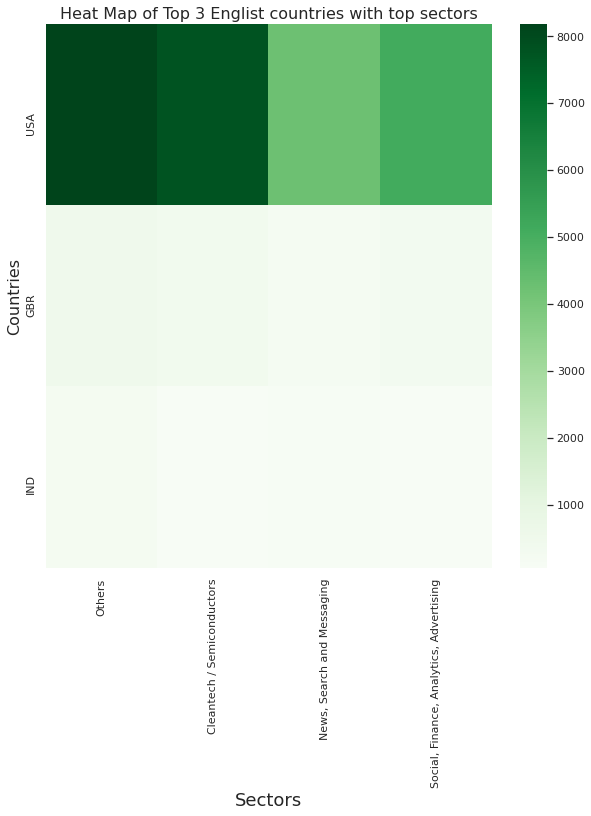

In [165]:
#To generate head map
sns.heatmap(sector_details,cmap="Greens")
plt.xlabel('Sectors', fontsize=18)
plt.ylabel('Countries', fontsize=16)
plt.title("Heat Map of Top 3 Englist countries with top sectors",fontsize=16)

In [102]:
#Getting company having maximum investments in top 3 sectors of USA
pd.pivot_table(c1.loc[c1.sector.isin(top_sector_c1)], values ='raised_amount_usd', 
               index =["sector","name",'permalink'], aggfunc = np.sum).sort_values(by="raised_amount_usd",
                                                                                   ascending=False)

raised_amount_usd
sector                                  name                    permalink                                               
Social, Finance, Analytics, Advertising appnexus                /organization/appnexus                        285.671856
                                        stripe                  /organization/stripe                          278.000000
Cleantech / Semiconductors              alien technology        /organization/alien-technology                265.000000
                                        relypsa                 /organization/relypsa                         255.729847
Others                                  force10 networks        /organization/force10-networks                255.067782
...                                                                                                                  ...
Social, Finance, Analytics, Advertising linkmeglobal            /organization/linkmeglobal                      0.001000
                                        sevenlunches            /organization/sevenlunches                      0.000291
                                        sentic technologies inc /organization/sentic-technologies-inc           0.000001
Others                                  promisec                /organization/promisec                          0.000000
Cleantech / Semiconductors              cosmosid                /organization/cosmosid                          0.000000

[11074 rows x 1 columns]

In [103]:
#Getting company having maximum investments in top 3 sectors of GBR
pd.pivot_table(c2.loc[c2.sector.isin(top_sector_c2)], values ='raised_amount_usd', 
               index =["sector","name",'permalink'], aggfunc = np.sum).sort_values(by="raised_amount_usd",
                                                                                   ascending=False)

raised_amount_usd
sector                                  name              permalink                                         
Others                                  farfetch          /organization/farfetch                  194.500000
Social, Finance, Analytics, Advertising powa technologies /organization/powa-technologies         176.700000
Cleantech / Semiconductors              circassia         /organization/circassia                 144.630999
                                        biovex            /organization/biovex                    133.314585
                                        kymab             /organization/kymab                     120.400000
...                                                                                                      ...
Social, Finance, Analytics, Advertising paperfold         /organization/paperfold                   0.056695
Others                                  socii             /organization/socii                       0.054000
Social, Finance, Analytics, Advertising scaleogy          /organization/scaleogy                    0.050000
                                        adwings           /organization/adwings                     0.024997
Others                                  cloud 66          /organization/cloudblocks                 0.022414

[825 rows x 1 columns]

In [138]:
#Getting company having maximum investments in top 3 sectors of IND
pd.pivot_table(c3.loc[c3.sector.isin(top_sector_c3)], values ='raised_amount_usd', 
               index =["sector","name",'permalink'], aggfunc = np.sum).sort_values(by="raised_amount_usd",
                                                                                   ascending=False)

raised_amount_usd
sector                                  name                          permalink                                                
News, Search and Messaging              quikr                         /organization/quikr-india                         196.000
Others                                  snapdeal                      /organization/snapdeal                            177.000
                                        myntra                        /organization/myntra                              158.750
                                        delhivery                     /organization/delhivery                           127.500
News, Search and Messaging              freecharge                    /organization/freecharge                          113.000
...                                                                                                                         ...
Others                                  sudiksha                      /organization/sudiksha                              0.075
                                        experifun                     /organization/experifun                             0.075
                                        egully                        /organization/egully                                0.050
News, Search and Messaging              zify - instant carpooling app /organization/zify                                  0.040
Social, Finance, Analytics, Advertising securesight technologies      /organization/securesight-technologies              0.010

[322 rows x 1 columns]

## Conclusion

Country  =  USA
<br> Amount = 5 million USD
<br> Sector = Cleantech / Semiconductors